In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import kagglehub
import os

# Download latest version
path = kagglehub.dataset_download("vijayvvenkitesh/microsoft-stock-time-series-analysis")

print("Path to dataset files:", path)

# Find the CSV file within the downloaded directory
dataset_path = '' # initialize the variable
for file in os.listdir(path):
    if file.endswith('.csv'):
         dataset_path = os.path.join(path, file)
         break  # Assuming there is only one CSV file

if dataset_path:
    df = pd.read_csv(dataset_path)  # Assuming it's a CSV file

    # Print the first few rows (head) of the dataset
    print(df.head())
else:
    print('No CSV file found in the downloaded directory.')


Path to dataset files: /root/.cache/kagglehub/datasets/vijayvvenkitesh/microsoft-stock-time-series-analysis/versions/1
                Date   Open   High    Low  Close    Volume
0  4/1/2015 16:00:00  40.60  40.76  40.31  40.72  36865322
1  4/2/2015 16:00:00  40.66  40.74  40.12  40.29  37487476
2  4/6/2015 16:00:00  40.34  41.78  40.18  41.55  39223692
3  4/7/2015 16:00:00  41.61  41.91  41.31  41.53  28809375
4  4/8/2015 16:00:00  41.48  41.69  41.04  41.42  24753438


In [ ]:
data_filled = df.fillna(method='ffill')

<ipython-input-11-45c9e880019c>:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_filled = df.fillna(method='ffill') # Replace 'data' with 'df'


In [ ]:
data_cleaned = data_filled.drop_duplicates()

In [ ]:
from scipy.stats import zscore
z_scores = zscore(data_cleaned['Close'])
outliers = abs(z_scores) > 3
data_cleaned.loc[outliers, 'Close'] = data_cleaned['Close'].median()


In [ ]:
data_cleaned['Normalized_Close'] = (data_cleaned['Close'] - data_cleaned['Close'].min()) / (data_cleaned['Close'].max() - data_cleaned['Close'].min())

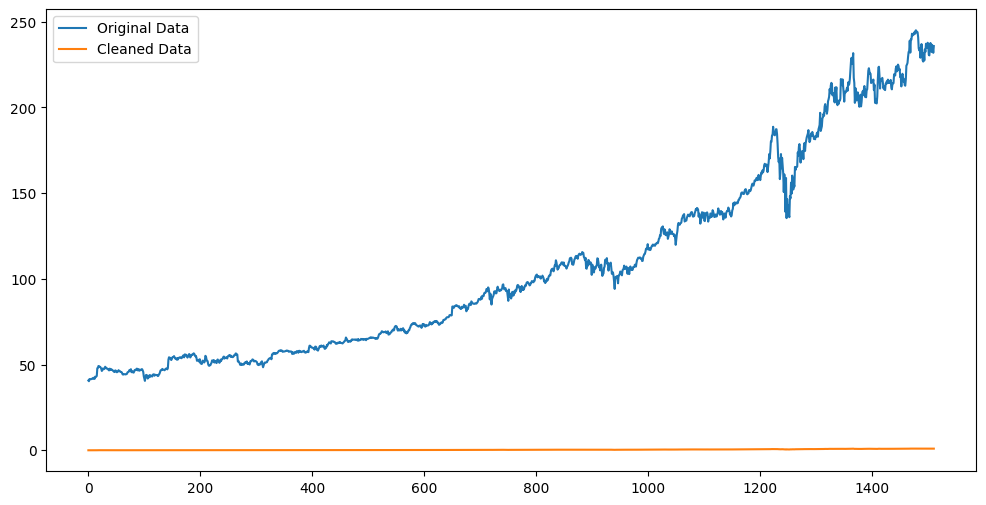

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Original Data')
plt.plot(data_cleaned['Normalized_Close'], label='Cleaned Data')
plt.legend()
plt.show()